# Task: Our task is predict the categorization of a persons credit score based on a selection of attributes

# 0 - Notebook Initialization

In [161]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings

In [162]:
test_url = "https://raw.githubusercontent.com/Harshk10-star/Credit-Score-Classification/466ff436e9a5623cb0b4c778c3fbf5da84d0ae76/train.csv"
#suppressing the warning for importing the dataset because we handle the error 
with warnings.catch_warnings(): 
    warnings.simplefilter("ignore")
    test_info = pd.read_csv(test_url, sep=',')

# 1 - Exploratory Data Analysis (EDA)
The first thing we need to do is see what information we will be working with for our model

In [163]:
test_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [164]:
test_info.shape

(100000, 28)

In [165]:
test_info.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [166]:
test_info.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [167]:
test_info.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

- Roughly 15% of entries do not contain a value for `Monthly_Inhand_Salary` 
- There are some columns who's data types are objects when they should be numerical like `Outstanding_Debt` for example

# Cleaning the data/pipeline

In [168]:
test_info.drop_duplicates(inplace=True) # removes duplicate rows
test_info.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [169]:
warnings.filterwarnings('ignore', message="A value is trying to be set on a copy of a DataFrame or Series.*")

In [170]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

columns_to_drop = ['ID', 'Customer_ID', 'Month', 'SSN', 'Type_of_Loan', 'Name']

test_info.drop(columns=columns_to_drop, inplace=True)
num_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
           'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
           'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

cat_features = ['Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation']

# Define functions for data cleaning
def cleanCategoricalGarbageInputs(df, colName, string):
    df[colName] = df[colName].replace(string, np.nan)
    return df


def cleanColumnUnderscore(df, colName):
    df[colName] = df[colName].str.replace('_', '')
    return df

def cleanAge(df):
    copy = df.copy()
    copy['Age'] = pd.to_numeric(copy['Age'], errors='coerce')
    filtered_ages = copy[(copy['Age'] >= 0) & (copy['Age'] <= 100)]['Age']
    mean_age = int(filtered_ages.mean())
    copy.loc[copy['Age'] < 0, 'Age'] = mean_age
    copy.loc[copy['Age'] > 100, 'Age'] = mean_age
    return copy
    
def convert_to_numeric(df, col_name):
    copy = df.copy()
    copy[col_name] = pd.to_numeric(copy[col_name], errors='coerce')
    return copy

def clean_monthly_inhand(df):
    copy = df.copy()
    missing_indices = copy[copy['Monthly_Inhand_Salary'].isnull()].index
    for index in missing_indices:
        annual_income = copy.loc[index, 'Annual_Income']
        similar_salaries = copy[(copy['Annual_Income'] >= annual_income - 10000) & 
                            (copy['Annual_Income'] <= annual_income + 10000) & 
                            copy['Monthly_Inhand_Salary'].notnull()]
        if not similar_salaries.empty:
            estimated_salary = similar_salaries['Monthly_Inhand_Salary'].median()
            copy.loc[index, 'Monthly_Inhand_Salary'] = estimated_salary
    
    return copy 

def fill_with_mean(df, col_name):
    copy = df.copy()
    copy[col_name] = pd.to_numeric(copy[col_name], errors='coerce')
    copy[col_name].fillna(copy[col_name].mean(), inplace=True)
    return copy

 
def clean_num_of_loan(df):
    copy = df.copy()
    copy['Num_of_Loan'] = copy['Num_of_Loan'].astype(str) # converts vals in column to string
    copy['Num_of_Loan'] = copy['Num_of_Loan'].str.replace('_', '') # removes underscores from string
    copy['Num_of_Loan'] = pd.to_numeric(copy['Num_of_Loan'], errors='coerce') # converts string to int value
    copy.loc[copy['Num_of_Loan'] < 0, 'Num_of_Loan'] = 0 #changes any negative values to 0

    return copy

def clean_inquires(df):
    copy = df.copy()
    sum_values = copy['Num_Credit_Card'] + copy['Num_of_Loan']
    copy['Num_Credit_Inquiries'].fillna(sum_values, inplace=True)

    return copy

def clean_credit_history_age(df):
    copy = df.copy()
    copy['Credit_History_Age'] = copy['Credit_History_Age'].str.extract(r'(\d+) Years')
    copy['Credit_History_Age'] = pd.to_numeric(copy['Credit_History_Age'], errors='coerce')
    copy['Credit_History_Age'].fillna(0, inplace=True)
    return copy

def clean_amount_invested_monthly(df):
    copy = df.copy()

    copy['Amount_invested_monthly'] = pd.to_numeric(copy['Amount_invested_monthly'], errors='coerce')

    # Filter out NaN values in 'Amount_invested_monthly'
    not_null_investments = copy.dropna(subset=['Amount_invested_monthly'])

    # Iterate through missing indices and fill with median of similar salaries
    missing_indices = copy[copy['Amount_invested_monthly'].isnull()].index
    for index in missing_indices:
        annual_income = copy.loc[index, 'Annual_Income']
        similar_salaries = not_null_investments[(not_null_investments['Annual_Income'] >= annual_income - 10000) & 
                                                (not_null_investments['Annual_Income'] <= annual_income + 10000)]
        if not similar_salaries.empty:
            estimated_salary = similar_salaries['Amount_invested_monthly'].median()
            copy.loc[index, 'Amount_invested_monthly'] = estimated_salary
    copy['Amount_invested_monthly'].fillna(0, inplace=True)
    
    return copy
    
def drop_subset_col(df, col):
    copy = df.copy()
    copy.dropna(subset=[col], inplace=True)
    return copy

def monthly_balance(df):
    copy = df.copy()

    copy['Monthly_Balance'] = pd.to_numeric(copy['Monthly_Balance'], errors='coerce')

    # Filter out NaN values in 'Amount_invested_monthly'
    not_null_investments = copy.dropna(subset=['Monthly_Balance'])

    # Iterate through missing indices and fill with median of similar salaries
    missing_indices = copy[copy['Monthly_Balance'].isnull()].index
    for index in missing_indices:
        annual_income = copy.loc[index, 'Annual_Income']
        similar_salaries = not_null_investments[(not_null_investments['Annual_Income'] >= annual_income - 10000) & 
                                                (not_null_investments['Annual_Income'] <= annual_income + 10000)]
        if not similar_salaries.empty:
            estimated_salary = similar_salaries['Monthly_Balance'].median()
            copy.loc[index, 'Monthly_Balance'] = estimated_salary
    
    return copy

def clean_num_of_delayed_payments(df):
    copy = df.copy()

    copy['Num_of_Delayed_Payment'] = copy['Num_of_Delayed_Payment'].str.replace('_', '') 
    copy['Num_of_Delayed_Payment'] = copy['Num_of_Delayed_Payment'].replace(r'.*-', '0', regex=True)
    copy['Num_of_Delayed_Payment'] = pd.to_numeric(copy['Num_of_Delayed_Payment'], errors='coerce')
    
    return copy
    
num_transformer = Pipeline(steps=[
    ('leaner', FunctionTransformer(lambda x: cleanColumnUnderscore(x, 'Age'))),
    ('ceaner', FunctionTransformer(lambda x: cleanColumnUnderscore(x, 'Annual_Income'))),
    ('clean age', FunctionTransformer(lambda x: cleanAge(x))),
    ('Anual_income to numeric', FunctionTransformer(lambda x: convert_to_numeric(x,'Annual_Income'))),
    ('clean amount invested monthly', FunctionTransformer(lambda x: clean_amount_invested_monthly(x))),
    ('clean monthly inhand', FunctionTransformer(lambda x: clean_monthly_inhand(x))),
    ('clean num_of_loan', FunctionTransformer(lambda x: clean_num_of_loan(x))),
    ('clean inquries', FunctionTransformer(lambda x: clean_inquires(x))),
    ('clean credit hisotry age', FunctionTransformer(lambda x: clean_credit_history_age(x))),
    ('clean delayed payments', FunctionTransformer(lambda x: clean_num_of_delayed_payments(x))),
    ('fill delayed payments', FunctionTransformer(lambda x: fill_with_mean(x, 'Num_of_Delayed_Payment'))),
    ('clean monthly balance', FunctionTransformer(lambda x: monthly_balance(x))),
    ('convert changed credit limit', FunctionTransformer(lambda x: convert_to_numeric(x,'Changed_Credit_Limit'))),
    ('convert outstanding debt', FunctionTransformer(lambda x: convert_to_numeric(x,'Outstanding_Debt'))),
    ('fill inhand salary', FunctionTransformer(lambda x: fill_with_mean(x, 'Monthly_Inhand_Salary'))),
    ('fill credit limit', FunctionTransformer(lambda x: fill_with_mean(x, 'Changed_Credit_Limit'))),
    ('fill outstanding debt', FunctionTransformer(lambda x: fill_with_mean(x, 'Outstanding_Debt'))),
    ('fill monthly balance', FunctionTransformer(lambda x: fill_with_mean(x, 'Monthly_Balance')))
])

imputer = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore')

# Create the cat_transformer pipeline
cat_transformer = Pipeline(steps=[
    ('clean occupational garbage input', FunctionTransformer(lambda x: cleanCategoricalGarbageInputs(x, 'Occupation', '_______'))),
    ('clean payment behaviour garbage input', FunctionTransformer(lambda x: cleanCategoricalGarbageInputs(x, 'Payment_Behaviour', '!@9#%8'))),
    ('clean credit mix garbage input', FunctionTransformer(lambda x: cleanCategoricalGarbageInputs(x, 'Credit_Mix', '_'))),
    ('imputer', imputer),  # Impute missing values
    ('onehot', encoder)    # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])
    

clean_data = preprocessor.fit_transform(test_info)
clean_data_df = pd.DataFrame(clean_data)
clean_data_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
dtype: int64

In [171]:
transformed_df = pd.DataFrame(clean_data, columns=num_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_features)))

# Get columns with null values
cols_with_null = transformed_df.columns[transformed_df.isnull().any()]

# Print the names of columns with null values
for col in cols_with_null:
    print(col)


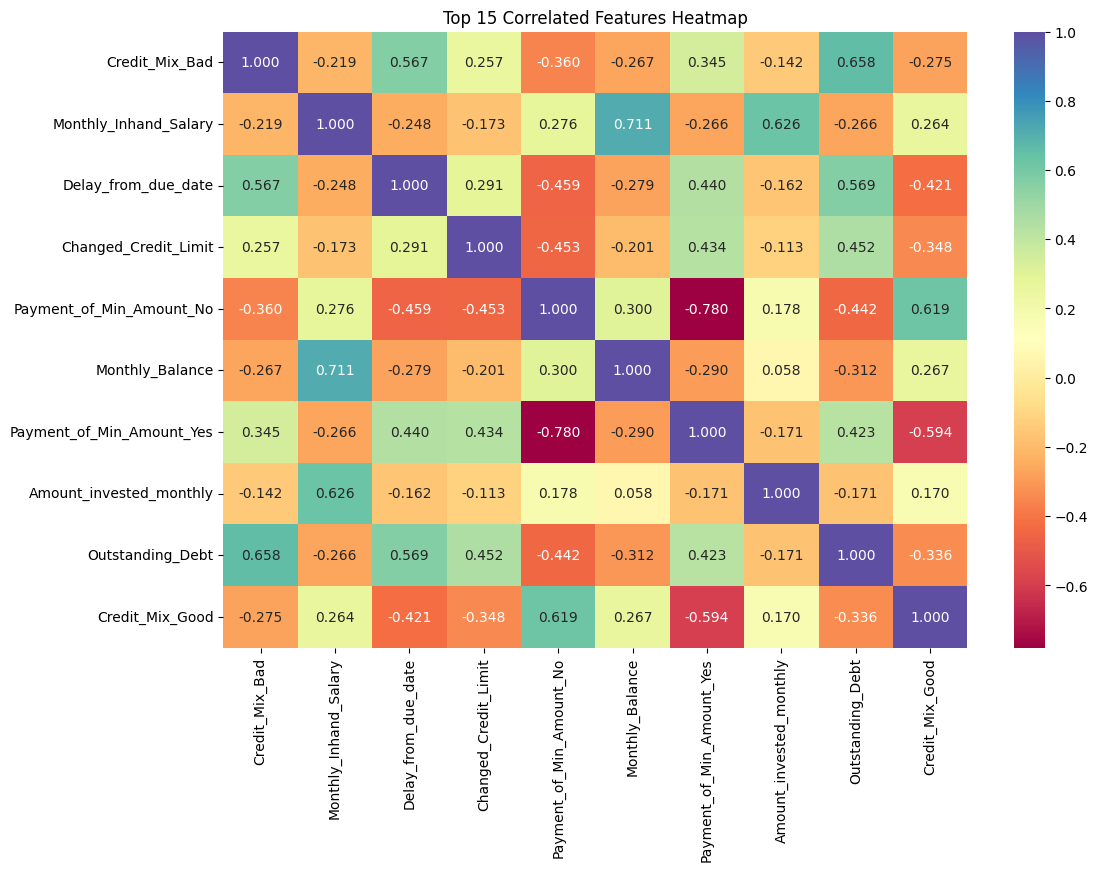

In [172]:
def show_heat_map(data, top_n=15):
    correlation_matrix = data.corr()
    top_correlations = correlation_matrix.unstack().sort_values(ascending=False)
    top_correlations = top_correlations[top_correlations != 1.0]  # Exclude self-correlation

    # Select the top N correlated pairs
    top_pairs = top_correlations.head(top_n)

    # Get unique columns from the top pairs
    unique_cols = list(set([pair[0] for pair in top_pairs.index] + [pair[1] for pair in top_pairs.index]))

    # Filter the correlation matrix to include only the top correlated columns
    top_corr_matrix = correlation_matrix.loc[unique_cols, unique_cols]

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        top_corr_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title(f"Top {top_n} Correlated Features Heatmap")

# Example usage
show_heat_map(transformed_df, top_n=15)
plt.show()

<Axes: ylabel='count'>

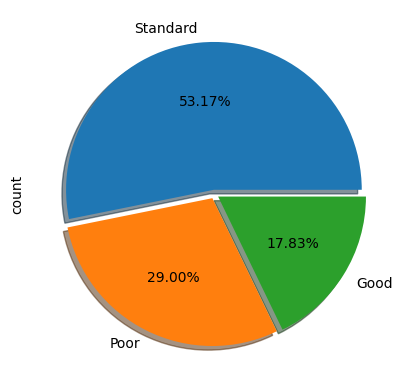

In [173]:
test_info["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Poor", "Good"],
)

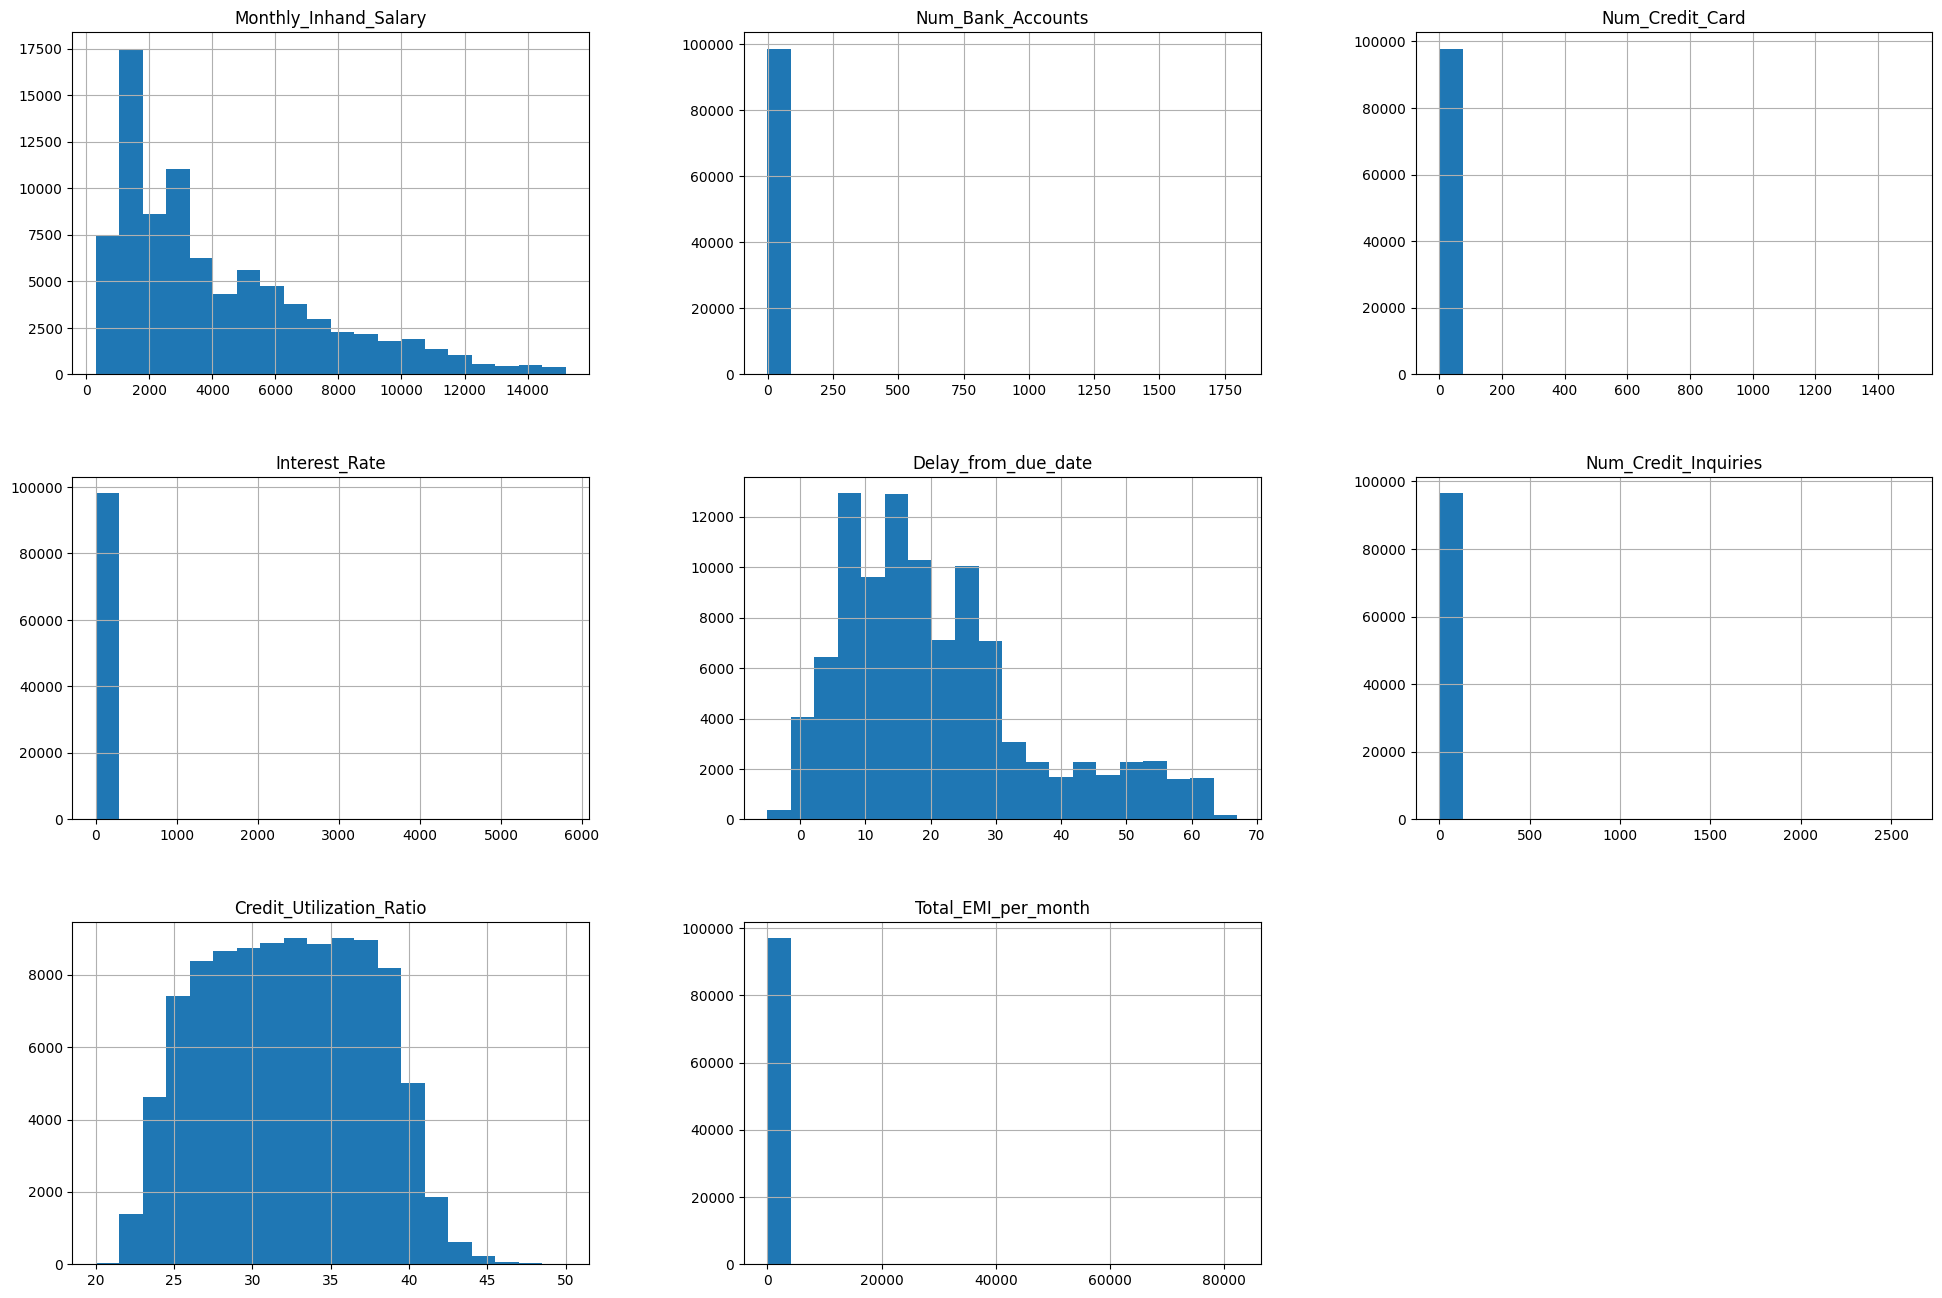

In [174]:
#change scaling on some of these graphs.
# test_info.hist(figsize=(24, 16))
# plt.show()
test_info.hist(bins=20, figsize=(24, 16))
plt.show()

In [175]:
def count_high_income_rows(df, threshold=20000000):  # Default threshold set to 10 million
    # Filter rows where Annual_Income is higher than the threshold
    high_income_rows = df[df['Annual_Income'] > threshold]
    
    # Print the number of rows
    print(f"Number of rows where Annual Income is higher than {threshold}: {len(high_income_rows)}")

# Example usage:
# Assuming 'transformed_df' is your DataFrame containing the data
count_high_income_rows(transformed_df)


Number of rows where Annual Income is higher than 20000000: 180


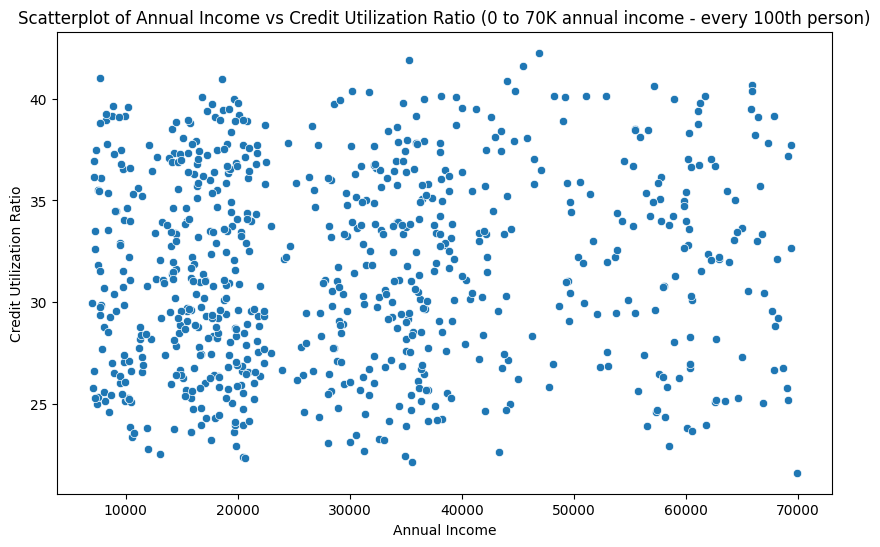

In [176]:
# Filter out rows where Annual_Income is between 0 and 70,000
filtered_df = transformed_df[(transformed_df['Annual_Income'] >= 0) & (transformed_df['Annual_Income'] <= 70000)]

# Filter every 10th row
filtered_df = filtered_df[::100]

# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Annual_Income', y='Credit_Utilization_Ratio', data=filtered_df)

# Set plot title and labels
plt.title('Scatterplot of Annual Income vs Credit Utilization Ratio (0 to 70K annual income - every 100th person)')
plt.xlabel('Annual Income')
plt.ylabel('Credit Utilization Ratio')

# Show plot
plt.show()

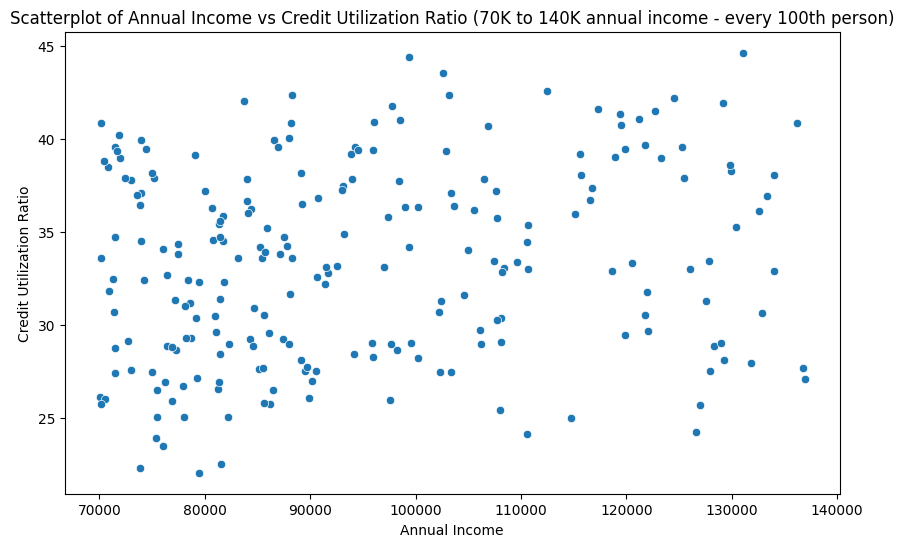

In [177]:
# Filter out rows where Annual_Income is between 70,000 and 140,000
filtered_df = transformed_df[(transformed_df['Annual_Income'] >= 70000) & (transformed_df['Annual_Income'] <= 140000)]

# Filter every 10th row
filtered_df = filtered_df[::100]

# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Annual_Income', y='Credit_Utilization_Ratio', data=filtered_df)

# Set plot title and labels
plt.title('Scatterplot of Annual Income vs Credit Utilization Ratio (70K to 140K annual income - every 100th person)')
plt.xlabel('Annual Income')
plt.ylabel('Credit Utilization Ratio')

# Show plot
plt.show()

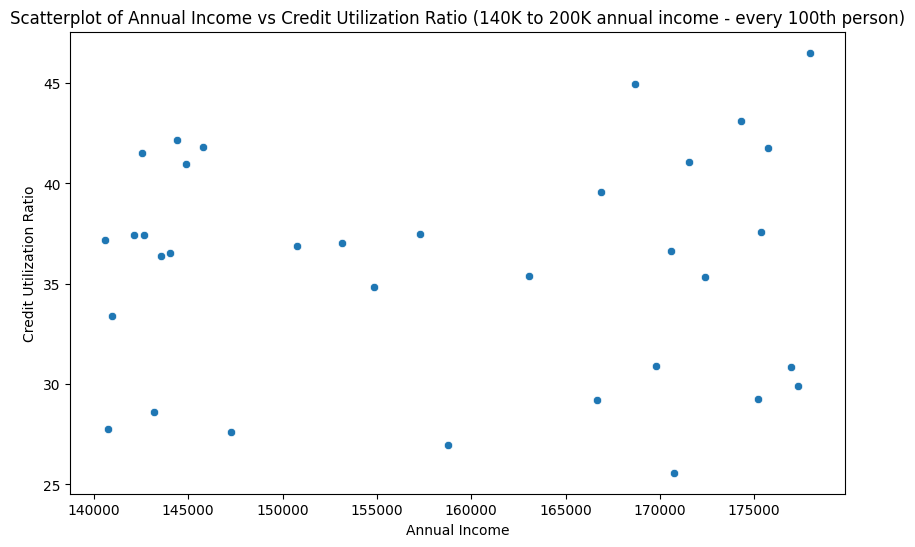

In [178]:
# Filter out rows where Annual_Income is between 140,000 and 200,000
filtered_df = transformed_df[(transformed_df['Annual_Income'] >= 140000) & (transformed_df['Annual_Income'] <= 200000)]

# Filter every 10th row
filtered_df = filtered_df[::100]

# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Annual_Income', y='Credit_Utilization_Ratio', data=filtered_df)

# Set plot title and labels
plt.title('Scatterplot of Annual Income vs Credit Utilization Ratio (140K to 200K annual income - every 100th person)')
plt.xlabel('Annual Income')
plt.ylabel('Credit Utilization Ratio')

# Show plot
plt.show()

In [179]:
x = test_info.drop(['Credit_Score'], axis=1)
y = test_info['Credit_Score']
#this is the Random Forest model's piepeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])

#this is the Gradient Boosting model's piepeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', GradientBoostingClassifier(random_state=42))])

#this is the Logistic Regression model's piepeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [180]:
from sklearn.metrics import accuracy_score, classification_report

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Train and evaluate Gradient Boosting
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("\nGradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Random Forest Accuracy: 0.7784
Random Forest Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.70      0.71      3527
        Poor       0.78      0.78      0.78      5874
    Standard       0.80      0.80      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.76      0.76     20000
weighted avg       0.78      0.78      0.78     20000


Gradient Boosting Accuracy: 0.69895
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        Good       0.58      0.60      0.59      3527
        Poor       0.73      0.64      0.69      5874
    Standard       0.72      0.76      0.74     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.67      0.67     20000
weighted avg       0.70      0.70      0.70     20000



c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.54945
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Good       0.27      0.01      0.02      3527
        Poor       0.51      0.53      0.52      5874
    Standard       0.57      0.74      0.64     10599

    accuracy                           0.55     20000
   macro avg       0.45      0.43      0.39     20000
weighted avg       0.50      0.55      0.50     20000



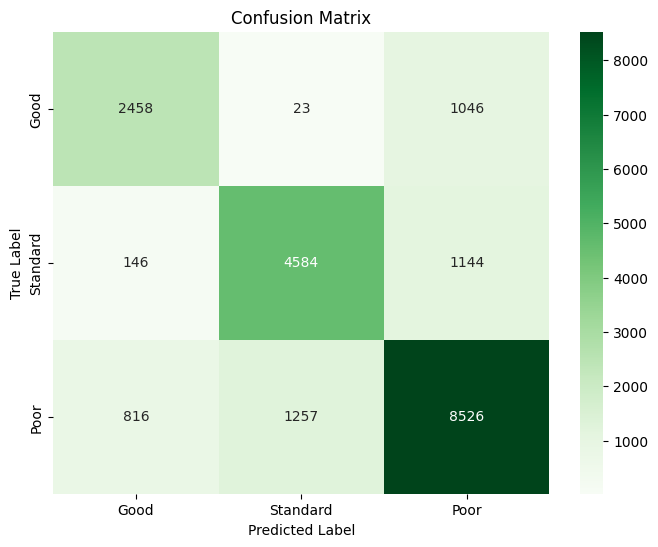

In [181]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Good', 'Standard', 'Poor']
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.show()

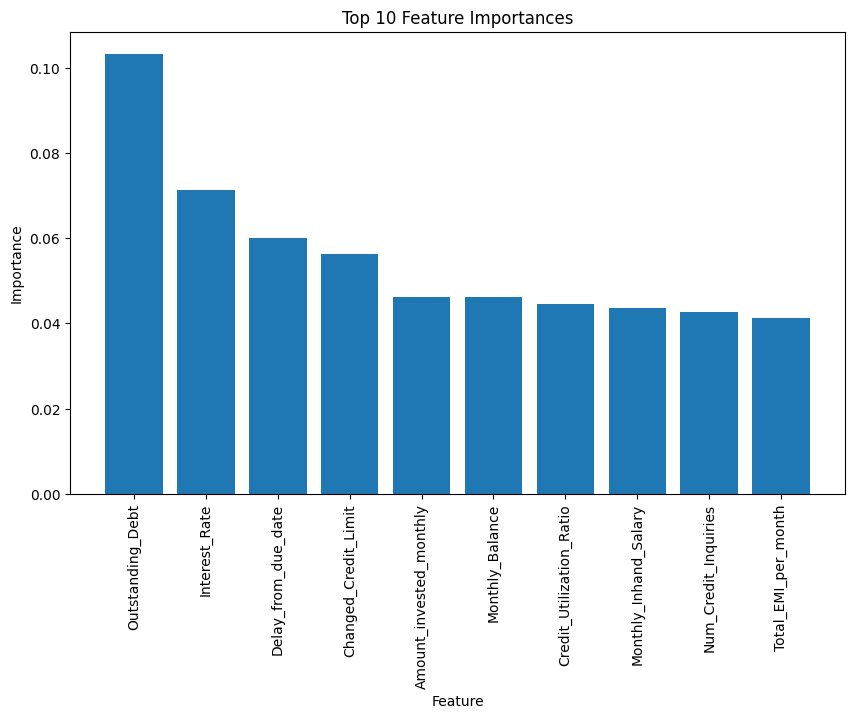

In [195]:
feature_importance = rf_pipeline.named_steps['classifier'].feature_importances_

# Get the names of your features
indices = np.argsort(feature_importance)[::-1][:10]  # Select top 10 indices

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), feature_importance[indices], align='center')
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)  # Set ticks and labels for top 10 features only
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()